# Frequency resolution limits

Well-known limits in the frequency resolution of transformations from the time domain depend on the assumption of regular sampling and exactness of the reconstruction. If we instead use irregular sampling and/or allow for a certain loss of fidelity, then we can use *compressed sensing* to reconstruct frequencies beyond the Nyquist limit. 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.optimize as opt
import scipy.fftpack as fft
import scipy.ndimage as img

from sklearn import linear_model
from scipy.sparse import coo_matrix

In [2]:
sfreq = 500.
tmax = 1.
n = int(sfreq * tmax)
t = np.arange(0., tmax, 1./ sfreq)

f1, f2 = 1., 249.9
a1, a2 = 1.0, 0.2
y = a1 * np.sin(f1 * 2. * np.pi * t) + a2 * np.sin(f2 * 2. * np.pi * t)

Text(0.5, 1.0, 'Original signal')

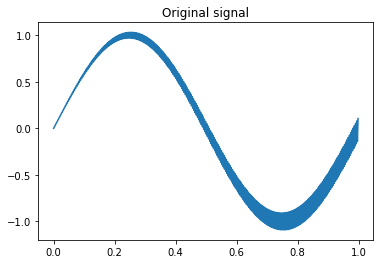

In [3]:
%matplotlib inline
plt.plot(t,y)
plt.title("Original signal")

Text(0.5, 1.0, 'Small segment of original signal')

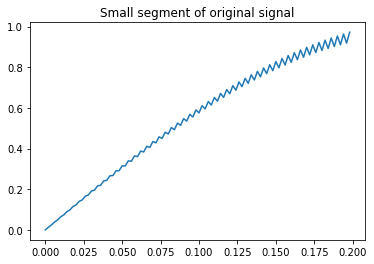

In [4]:
%matplotlib inline
plt.plot(t[:100],y[:100])
plt.title("Small segment of original signal")

In [5]:
yt = fft.dct(y)
freqs = np.linspace(0., sfreq / 2., n)

Text(0.5, 1.0, 'Spectral components')

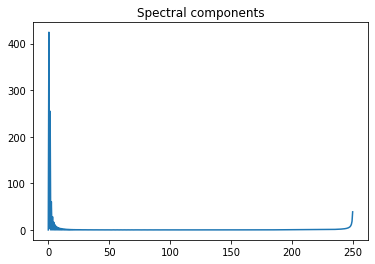

In [6]:
%matplotlib inline
plt.plot(freqs,np.abs(yt))
plt.title("Spectral components")

In [7]:
sfreq_downsample = 100.
n_downsample = int(tmax * sfreq_downsample)
k = np.random.randint(0, n, (n_downsample,))
k = np.sort(k)  

y_downsample = np.zeros(n)
y_downsample[:] = np.nan
y_downsample[k] = y[k]

t_downsample = np.zeros(n)
t_downsample[:] = np.nan
t_downsample[k] = t[k]

Text(0.5, 1.0, 'Downsampled signal showing non-deleted segments')

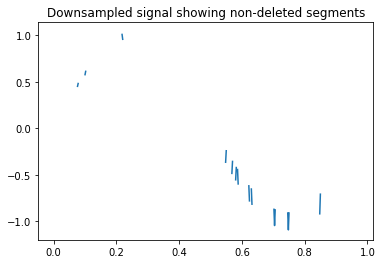

In [8]:
%matplotlib inline
plt.plot(t_downsample,y_downsample)
plt.title("Downsampled signal showing non-deleted segments")

Text(0.5, 1.0, 'Downsampled signal ignoring deleted segments')

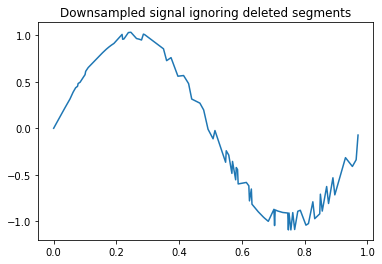

In [9]:
%matplotlib inline
plt.plot(t[k],y[k])
plt.title("Downsampled signal ignoring deleted segments")

In [10]:
y_downsample0 = np.zeros(n)
y_downsample0[k] = y[k]
yt_downsample = fft.dct(y_downsample0)
freqs = np.linspace(0., sfreq / 2., n)

Text(0.5, 1.0, 'Spectral components of downsampled signal')

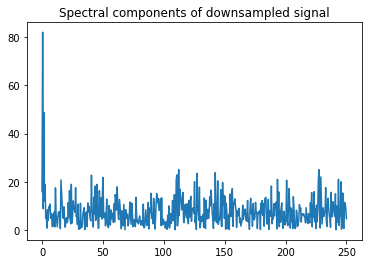

In [11]:
%matplotlib inline
plt.plot(freqs,np.abs(yt_downsample))
plt.title("Spectral components of downsampled signal")

In [12]:
D = fft.dct(np.eye(n))
A = D[k, :]

In [13]:
lasso = linear_model.Lasso(alpha=0.001)
lasso.fit(A, y[k])

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [14]:
y_reconstructed = fft.idct(lasso.coef_.reshape((n, 1)), axis=0) 

Text(0.5, 1.0, 'Reconstucted Signal')

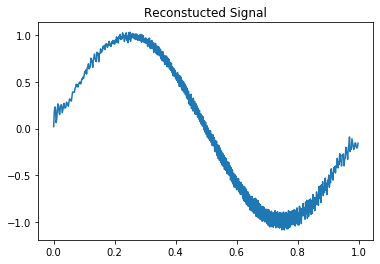

In [15]:
%matplotlib inline
plt.plot(t,y_reconstructed)
plt.title('Reconstucted Signal')

Text(0.5, 1.0, 'Spectral components of reconstructed signal')

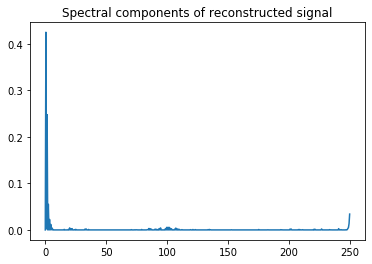

In [16]:
%matplotlib inline
yt_reconstructed = lasso.coef_.reshape((n, 1))#lasso.coef_.reshape((n, 1))
freqs = np.linspace(0., sfreq / 2., n)
plt.plot(freqs,np.abs(yt_reconstructed))
plt.title("Spectral components of reconstructed signal")

Text(0.5, 1.0, 'Comparison of orignal, downsampled and reconstructed signals')

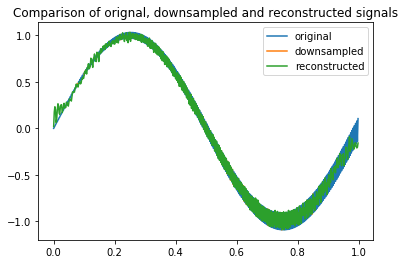

In [17]:
plt.plot(t,y, label="original")
plt.plot(t_downsample, y_downsample, label="downsampled")
plt.plot(t,y_reconstructed, label="reconstructed")
plt.legend()
plt.title('Comparison of orignal, downsampled and reconstructed signals')

Text(0.5, 1.0, 'Comparison of orignal, downsampled and reconstructed signals')

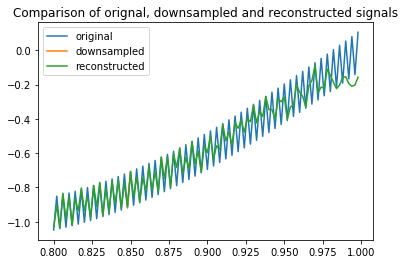

In [18]:
plt.plot(t[-100:],y[-100:], label="original")
plt.plot(t_downsample[-100:], y_downsample[-100:], label="downsampled")
plt.plot(t[-100:],y_reconstructed[-100:], label="reconstructed")
plt.legend()
plt.title('Comparison of orignal, downsampled and reconstructed signals')